<a href="https://colab.research.google.com/github/wolfdale229/projects/blob/master/Dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **End-to-End multi_class Dog Breed classification**
This notebook builds an end-to-end multi-class image classifier using Tensorfloe 2.0 and Tensorboard Hub.


## 1. **`Problem Definition`**
Identifying the breed of a dog given an image of any dog. How easy can the model identify the breed of any dog given to it.

## 2. **`Data`**
The data i am using s from kaggle's dog-breed identification competition...https://www.kaggle.com/c/dog-breed-identification/data

## 3 **`Tools`**
Tools include :
> 
 - Tensorflow.
 - TensorHub.
 - Pandas.
 - Numpy.
 - Matplotlib.
 - GPU.

## 4. **`Evaluation`** 
The model is evaluated on `Multi Class`` Log Loss between the predicted probability and the observed target as stated on the kaggle's website...https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 5. **`Features`**
Features are unstructured data, therefore a deep learning model would be used
* There are 120 different breed of dogs, therefore a multi-class classification problem.
* The training has around 10,000+ labeled images.
* The test set has around 10,000+ unlabeled images.


In [0]:
train_file = '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train'
test_file = '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/test'
label_file = '/content/drive/My Drive/deep learning /Dog Vision/labels.csv'

## **Import Tools**
In this section we import all necessary tools and check the verson and availability of a Graphic Processing Unit (GPU).

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image

from sklearn.model_selection import train_test_split

print('TensorFlow version : ',tf.__version__)
print('TensorFlow hub version : ', hub.__version__)

TensorFlow version :  2.2.0-rc3
TensorFlow hub version :  0.8.0


In [4]:
# check for GPU availability
if tf.config.list_physical_devices : 
  print('GPU available')
else :
  print("GPU not available")

GPU available


## **Getting Data Ready**

Turning the data (images) into tensors

In [5]:
labels = pd.read_csv(label_file)
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
labels.describe()


,id,breed
count,10222,10222
unique,10222,120
top,f45060c4cac8b690aaa61a510e1d30c5,scottish_deerhound
freq,1,126


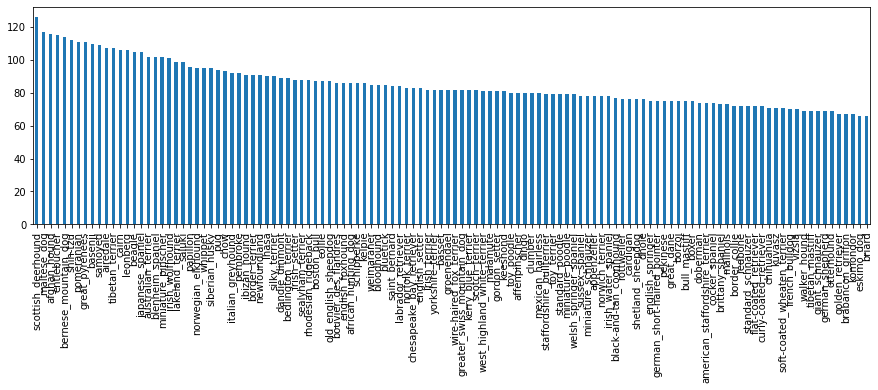

In [7]:
# plotting 30 samples of the label 
labels['breed'].value_counts().plot.bar(figsize=(15, 4))
plt.show()

In [8]:
labels['breed'].value_counts().median()

82.0

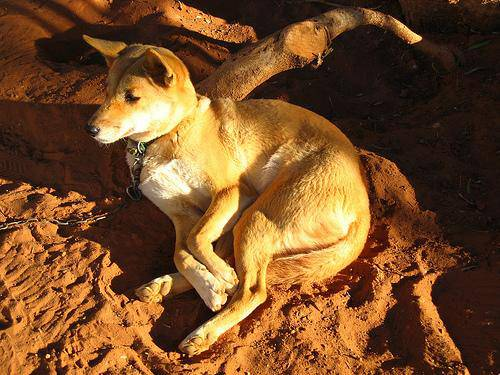

In [9]:
# dealing with image files
Image('/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

In [10]:
filepath = '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/'
filenames = [filepath+fname+'.jpg' for fname in labels['id']]
filenames[:10]

['/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Driv

In [11]:
import os 
if len(os.listdir(filepath)) == len(filenames):
  print('File lengths match')
else:
  print('Files missing')

File lengths match


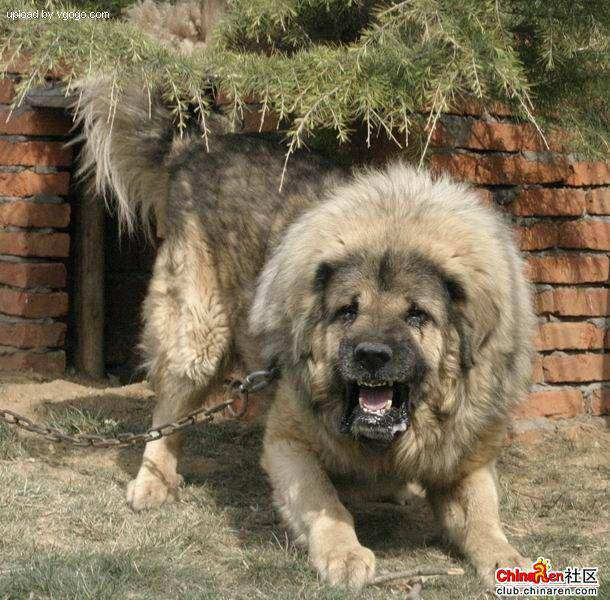

In [12]:
# checking if the file naming convention works, display the 9000th image
Image(filenames[9000])

In [13]:
# Name of the 9000th dog breed
print(labels['breed'][9000])

tibetan_mastiff


In [14]:
# checking the labels file , change to numpy array
labels_breed = labels['breed'].to_numpy()
labels_breed

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
if len(labels) == len(filenames):
  print('File size match')
else :
  print('Files do not match')

File size match


In [16]:
# finding the unique label values
unique_breed = np.unique(labels_breed)
print(unique_breed)

['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'
 'italian

In [17]:
len(unique_breed)

120

In [18]:
# Turn every labels into a bollean value
bool_labels = [label == unique_breed for label in labels_breed]
bool_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

Makinsg a validation and training set for the model, set the number of samples to work on  to ~10000

In [0]:
# make the features and label parameters
X = filenames
y = bool_labels

In [0]:
NUM_SAMPLES = 1000 #@param{type : 'slider', min : 1000, max : 10000, steps : 1000}


In [21]:
# split into train adn validaton set of total size of NUM_SAMPLE
X_train, X_valid, y_train, y_valid = train_test_split(X[:NUM_SAMPLES],
                                                      y[:NUM_SAMPLES],
                                                      test_size=0.2,
                                                      random_state=42)

len(y_train), len(y_valid), len(X_valid), len(X_train)


(800, 200, 200, 800)

In [22]:
X_train[:5], y_train[:5]

(['/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/My Drive/deep learning /Dog Vision/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, F

### Preprocessing images(turning images into Tensors)
NOTE : It's easier to work with file path than working with the image file directly

**`Things to do`**:
> 1. Take a `Image` filename as input.
2. Use TensorFlow to read the file and save it to a variable.
3. Turn the `Image` into Tensor.
4. Normalize color channel(turn the value from 0-225, to 0-1)
5. Resize the `Image` to shape (224, 224)
6. Return the modified `Image`

In [23]:
# convert image to numpy array
image = plt.imread(filenames[42])
image.shape

(257, 350, 3)

In [24]:
image.max(), image.min()

(255, 0)

In [25]:
image[2]

array([[ 56, 104,  66],
       [ 58, 106,  66],
       [ 64, 112,  72],
       ...,
       [ 71, 127,  82],
       [ 73, 129,  84],
       [ 73, 130,  85]], dtype=uint8)

In [26]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

#### making a process that a image and turn it into a Tensor


In [27]:
# define image size
IMG_SIZE = 224

def process_image(image_path, image_size=IMG_SIZE):
  """
  Takes an image file path, image size and turns the into a Tensor.
  """
  # read image 
  image = tf.io.read_file(image_path)
  # Turn te JPG image into numerical Tensor with 3 color channels RGB
  image = tf.image.decode_jpeg(image, channels=3)
  # convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # reshape/resize the image
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])
  return image

process_image(filenames[120])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7889621 , 0.6634719 , 0.5105307 ],
        [0.78970736, 0.6642171 , 0.51127595],
        [0.79098517, 0.6654949 , 0.51255375],
        ...,
        [0.65882355, 0.65882355, 0.65882355],
        [0.6573449 , 0.65794015, 0.6483112 ],
        [0.64819676, 0.6521183 , 0.6325105 ]],

       [[0.7687151 , 0.64322484, 0.49028364],
        [0.77588207, 0.6503918 , 0.49745065],
        [0.7883719 , 0.6628817 , 0.5099405 ],
        ...,
        [0.6591789 , 0.6591789 , 0.6591789 ],
        [0.6666601 , 0.66725534, 0.6576264 ],
        [0.6611957 , 0.66511726, 0.6455094 ]],

       [[0.7684087 , 0.6509804 , 0.4953519 ],
        [0.7684087 , 0.6509804 , 0.4953519 ],
        [0.76448715, 0.64705884, 0.49143034],
        ...,
        [0.66296107, 0.66296107, 0.66296107],
        [0.6633841 , 0.66397935, 0.6543504 ],
        [0.65463054, 0.6585521 , 0.63894427]],

       ...,

       [[0.4376471 , 0.36705887, 0.3121569 ],
        [0.32

## Turning the data into batches

In [0]:
# create a function that returns a tuple (image, label)

def get_image_label(image_path, label):
  ''' Takes in a image path and it's associated label and 
      returns a tuple of the image_path and label (image_path, label)
  '''
  image = process_image(image_path)
  return image, label

In [43]:
# checking the function
get_image_label(filenames[42], bool_labels[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [0]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 12

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  Creates batches of  data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  '''
  if test_data:
    print('Creating test set batches....')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is a valid dataset, no need to shuffle
  elif valid_data:
    print('Creating validation data batches....')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch 


  else :
    print('Creating training data batches....')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch


In [48]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_valid, y_valid, valid_data=True)

Creating training data batches....
Creating validation data batches....


In [49]:
# Attributes of data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))